# Machine Learnint Project:-1

### Importing required libraries

 ### 1) Problem Understanding (Business Understanding):-
 #### With growing health concerns pepople have become more health conscious . They are trying to remain healtht by exercising, maintaining diets , using health guidance apps etc. The Calories intake is one of the most important factor which could affect our health significantly . It's Calories that make people fat or skinny and could attract many diesease. Nowadays people are more concerned about calories intake and trying to maintain calories level in a limit to avoid excessive fats by exercising.
   ####    Our goal is to make predictive sytem which could predict how much calories are burned in exercise . Which could help people to track their calories level and would help them to take healty descisions.

#### Importing Required Libraries

In [1]:
import numpy as np                                   # To make numpy arrays
import pandas as pd                                  # To create Dataframe and perform EDA
import matplotlib.pyplot as plt                      # Matplotlib , seaborn libraries for visualization to make plots and graphs
import seaborn as sns
from sklearn.model_selection import train_test_split # To perform train-test split 
from xgboost import XGBRegressor                     # To create regression model
from sklearn import metrics                          # To evaluate model we have created
import warnings                                      # To avoid warning msg while ploting with seaborn
warnings.filterwarnings("ignore")

### 2) Data Collection & Cleaning
#### We will use dataset from kaggle .(Here we have prepared data. Otherwise we had to collecte it from the sources like websites,API or the or Company's costomer who wants the problem's solution (if they have it). 

#### We will Perform cleaning of data. For this we will check for missing values,duplicate values , unnecessary data etc. In order to prevent wrongful predictions, it is important to get rid of any inconsistencies in the data.

In [2]:
# loading the data from first csv file to DataFrame
calories = pd.read_csv(r'C:\Users\PRANIT SAWANT\Downloads\PORTFOLIO\jupyter notebooks and datasets to build portfolio projects and practice\Datasets\calories (calories burnt).csv')

In [3]:
# print the first 10 rows of the dataframe
calories.head(10)

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
5,15130815,123.0
6,19602372,112.0
7,11117088,143.0
8,12132339,134.0
9,17964668,72.0


In [4]:
# loading the data from second csv file to DataFrame
exercise_data = pd.read_csv(r'C:\Users\PRANIT SAWANT\Downloads\PORTFOLIO\jupyter notebooks and datasets to build portfolio projects and practice\Datasets\exercise (calories burnt).csv')

In [5]:
exercise_data.head(10)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
5,15130815,female,36,151.0,50.0,23.0,96.0,40.7
6,19602372,female,33,158.0,56.0,22.0,95.0,40.5
7,11117088,male,41,175.0,85.0,25.0,100.0,40.7
8,12132339,male,60,186.0,94.0,21.0,97.0,40.4
9,17964668,female,26,146.0,51.0,16.0,90.0,40.2


In [6]:
# To combine two dataframes
df = pd.concat([exercise_data, calories['Calories']], axis=1)

In [7]:
df.head(10)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
5,15130815,female,36,151.0,50.0,23.0,96.0,40.7,123.0
6,19602372,female,33,158.0,56.0,22.0,95.0,40.5,112.0
7,11117088,male,41,175.0,85.0,25.0,100.0,40.7,143.0
8,12132339,male,60,186.0,94.0,21.0,97.0,40.4,134.0
9,17964668,female,26,146.0,51.0,16.0,90.0,40.2,72.0


In [8]:
# To know the number of rows and columns
df.shape

(15000, 9)

In [9]:
# To get columns information from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [10]:
# To check for missing values in each column
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

### Data Analysis and Exploration
#### Here we will analyse data using pandas dataframe(we can use SQL  also) and would explore and visualize data using seaborn and matplotlib. 
   #### Here we will retrieve useful insights and study the behaviour of the data. By performing Exploratory Data Analysis(EDA) we will try to know characteristics of the data.

#### We will try to find answers to the following questions:
#### 1) What models have already worked well for this type of problem?
#### 2) What features would be useful for model buiding ?
#### 3) How would we evaluate the model? What metric(s) would we use?

#### 1) What models have already worked well for this type of problem?

#### answer:- As In this problem we have to predics calories burned in exercise .We will build regression model to predict calories burned.

In [11]:
df.head(20)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
5,15130815,female,36,151.0,50.0,23.0,96.0,40.7,123.0
6,19602372,female,33,158.0,56.0,22.0,95.0,40.5,112.0
7,11117088,male,41,175.0,85.0,25.0,100.0,40.7,143.0
8,12132339,male,60,186.0,94.0,21.0,97.0,40.4,134.0
9,17964668,female,26,146.0,51.0,16.0,90.0,40.2,72.0


In [12]:
df[['Height','Weight','Duration','Calories']]

,Height,Weight,Duration,Calories
0,190.0,94.0,29.0,231.0
1,166.0,60.0,14.0,66.0
2,179.0,79.0,5.0,26.0
3,179.0,71.0,13.0,71.0
4,154.0,58.0,10.0,35.0
...,...,...,...,...
14995,193.0,86.0,11.0,45.0
14996,165.0,65.0,6.0,23.0
14997,159.0,58.0,16.0,75.0
14998,193.0,97.0,2.0,11.0


#### 2) What features would be useful for model buiding ?
#### Answer:- To answer this question we must need some basic definitions related to the business problem. 

#### We know , There is relationship between Duration of exercise,Heart_Rate,Body_Temp,Calories.
#### More exercise -->> Increse heart rate-->>Increase in body temperature-->> More calories burn.
#### If we observe data from the dataframe then we can see above relation clearly.

In [13]:
# get some statistical insights in the data
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


#### This gives us quick overview of data . For instance 50% percentile row for 'age' column shows there are 50 % people in the data below 39 years old. 

#### Max row shows maximum height in the dataframe is of 222 centimenter. and so on......

In [14]:
### Data Visualization
sns.set() # To set background,i.e. grids etc. for data visualization

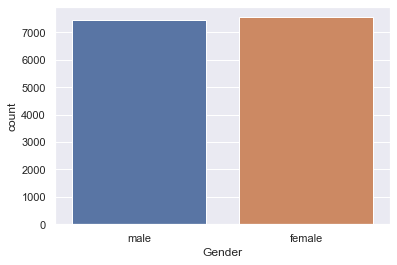

In [15]:
# plotting the gender column in count plot
sns.countplot(df['Gender'])
plt.show()

#### We have same no. of males in females no. in the data.So we can say it's very well distributed data set.

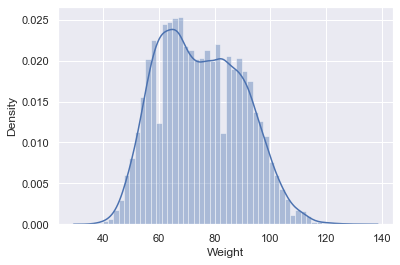

In [16]:
# finding the distribution of "Weight" column
sns.distplot(df['Weight'])
plt.show()

#### We can clearly see maximum no. of people are weighted between 60 to 80 kg. 

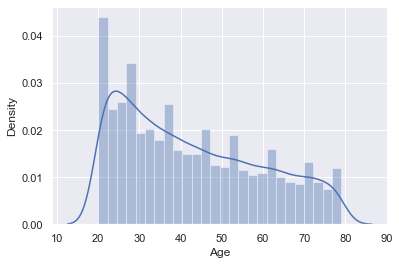

In [17]:
# finding the distribution of "Age" column
sns.distplot(df['Age'])
plt.show()

#### The data have more people who are aged between 20 to 30. and Noone aged below 20 and above 80. It also shows no. of people go to gim or exercising decreases with age.

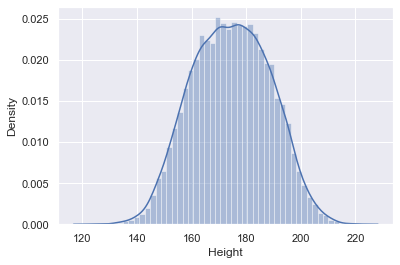

In [18]:
# finding the distribution of "Height" column
sns.distplot(df['Height'])
plt.show()

#### More Pepole have height between 160 to 190 .Noone below

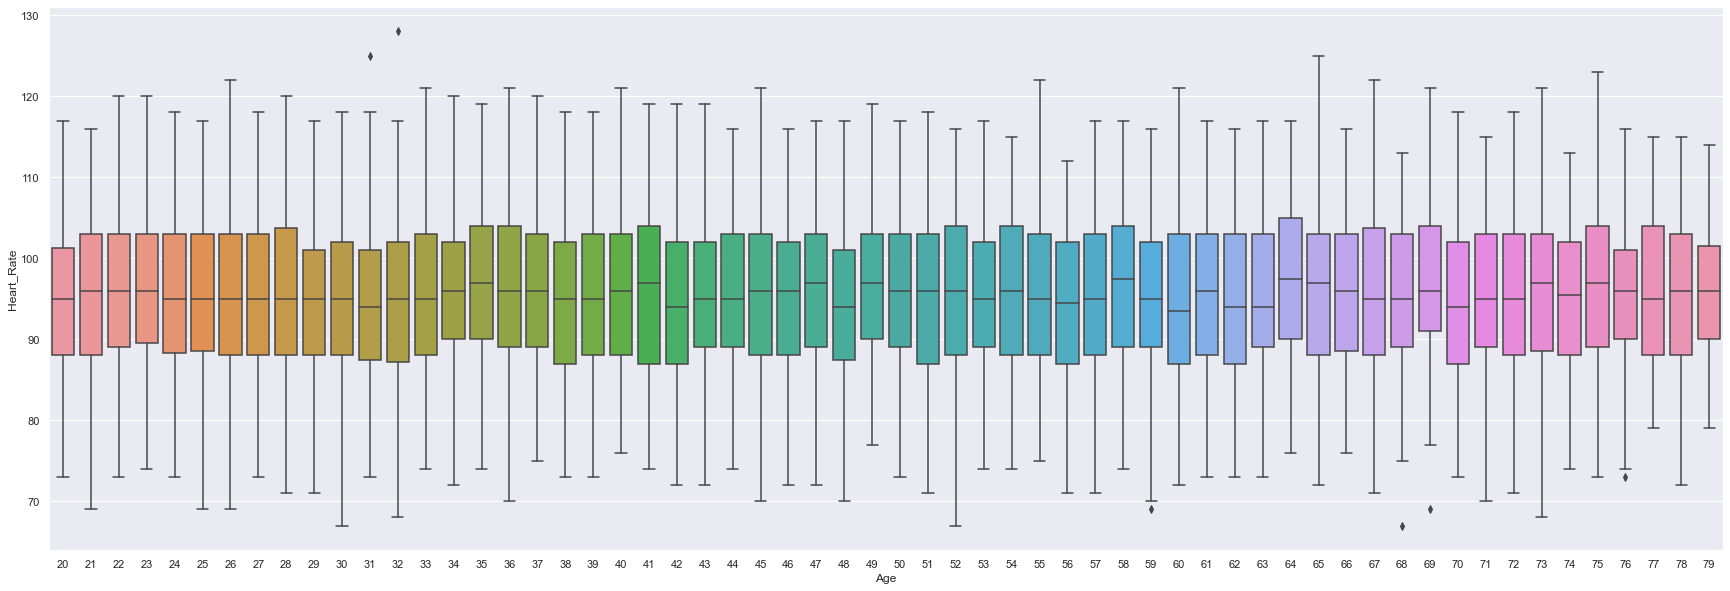

In [19]:
sns.set(rc={'figure.figsize':(30,10)})
sns.boxplot(df[ 'Age'],df['Heart_Rate'])
plt.show()

#### From the above graph we can conclude that there is no outlier present in the data as data as all values for 'heart rate'  with age shows no abnormality.

In [20]:
df1=df[['Gender','Age','Duration','Heart_Rate','Calories']].sort_values(by='Gender')

<AxesSubplot:xlabel='Gender', ylabel='Duration'>

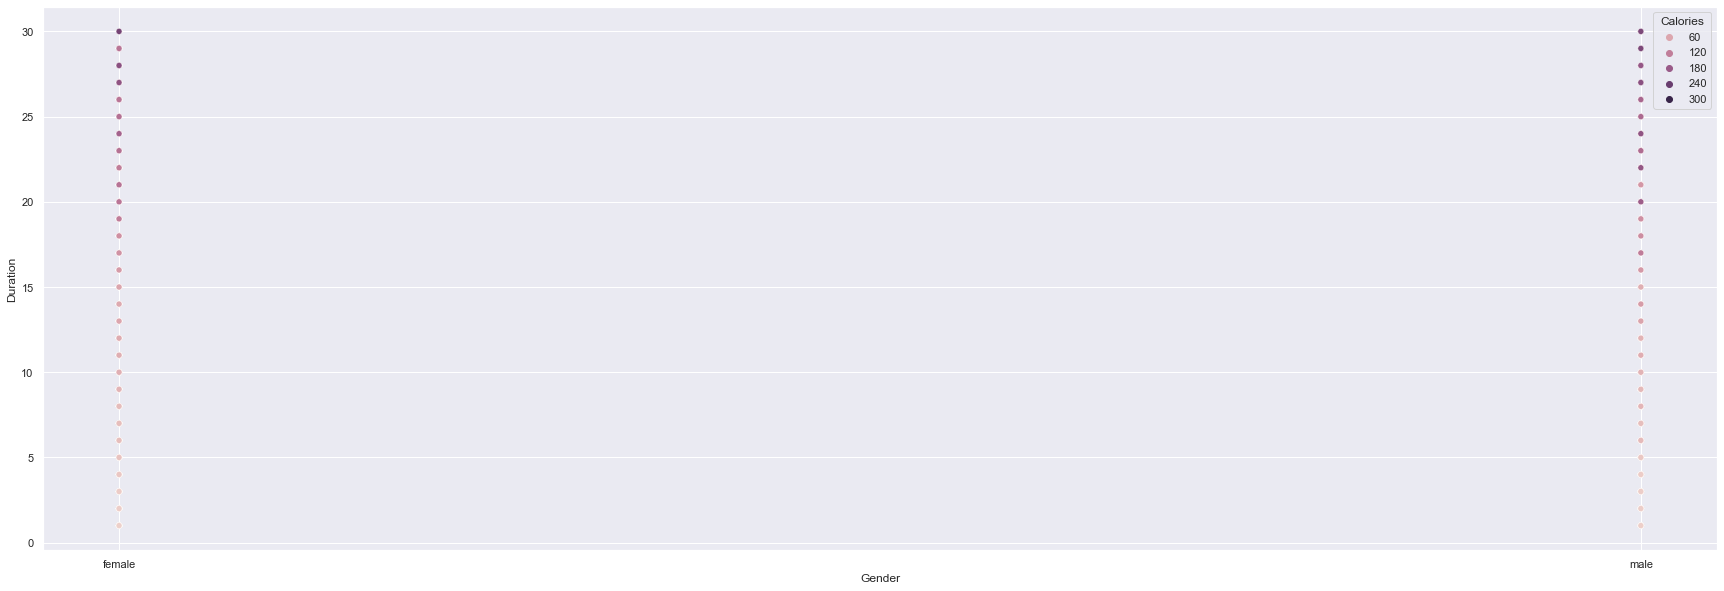

In [21]:
sns.scatterplot(df1.Gender,df1.Duration,df1.Calories)

#### There is no significant difference between Calories burn, Duration for each gender.

In [22]:
df.Gender.value_counts()

female    7553
male      7447
Name: Gender, dtype: int64

### Finding the Correlation in the dataset
#### There are two types of correlations.

#### 1) Positive Correlation:- One increase other would increase.
#### 2) Negative Correlation:-One increase other would decrease.

In [23]:
correlation = df.corr()

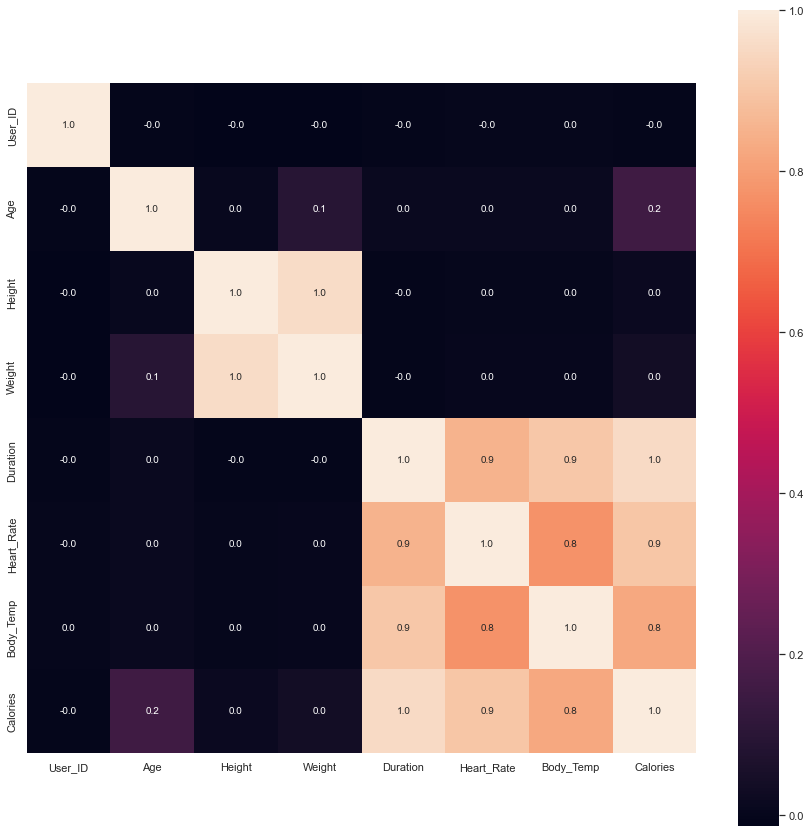

In [24]:
# constructing a heatmap to understand the correlation
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':10})
plt.show()

#### Conclusion:- From the above graph map shows there is positive correlation between 
1) Height and Weight (as person with more height would tend to have more weight)
2) Duration and Calories:- More exercise -->> More Calories burn.
3) Heart Rate and Calories:- More exercise -->> Increse in Heart Rate -->> More Calories burn.
4) Body temperature and Calories:- More Exersice -->> More Clorise burn -->> Increase in BodyTemperature


#### we will convert text data in the 'gender' column to numerical values as machines don't understand text data better. We will do this as follows.

In [25]:
df.replace({"Gender":{'male':0,'female':1}}, inplace=True) # By inplace=True we make permanent change in the dataframe.If we don't want permanet change then we don't mention it.

In [26]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


#### Now we will separate features and targets columns in the data.
#### We will drop User_id (it not useful for model building) and Calories column to get feature dataset . 
#### Calorise is our target column.
####  We will store calorise and features sets in the Y and X variables respectively.

In [27]:
X = df.drop(columns=['User_ID','Calories'], axis=1) # We use axis=1 for columns and axis = 0 for rows.
Y = df['Calories']

In [28]:
print(X)
print('*********************************************************************')
print(Y)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]
*********************************************************************
0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ... 

#### Splitting the data into training data and Test data

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


### Model Training

In [31]:
model = XGBRegressor()              # load the model

In [32]:
model.fit(X_train, Y_train)         # training the model with X_train

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

### Model Evaluation

 Prediction with Test Data

In [33]:
test_data_prediction = model.predict(X_test)

In [34]:
print(test_data_prediction)
print('*********************************************************')
print(Y_test) #### Let's print the actual values for the data

[127.823784 226.00154   38.66253  ... 144.3636    22.767195  89.87375 ]
*********************************************************
7592     127.0
3551     224.0
9698      38.0
3759       6.0
2353     137.0
         ...  
8859     177.0
2886      49.0
14357    145.0
9430      24.0
11870     90.0
Name: Calories, Length: 3000, dtype: float64


form the above , we can see we are getting values close to the original values.

#### Here we will use Mean Absolute Error as a metric for evaluation which calculate difference between original value and the predicted value by our model.

In [35]:
MAE = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [36]:
print("Mean Absolute Error = ", MAE)

Mean Absolute Error =  1.4807048829992613


#### Our goal shoul be /must be this 'mean absolute error' is minimum . Here we have get good predictive model with minimum absolute error. For instance our original value was 120 then our model is predicting ~ ~118.5. which is very good for the magnitude of data. There not much difference between actual and predicted values.